<a href="https://colab.research.google.com/github/ZAINABALBALUSHI/Mining-and-Predictive-Analytics/blob/main/ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
# Load
train_path = '/content/train.xlsx'
test_path = '/content/test.xlsx'
train_data = pd.read_excel(train_path)
test_data = pd.read_excel(test_path)

# Verify
print("Train Data Columns:", train_data.columns)
print("Test Data Columns:", test_data.columns)
target_column = 'SalePrice'
if target_column not in train_data.columns:
    raise KeyError(f"Target column '{target_column}' not found in train_data!")
print(f"Train Data Loaded: {train_data.shape}")
print(f"Test Data Loaded: {test_data.shape}")

Train Data Columns: Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'Gara


Descriptive Statistics:
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   18

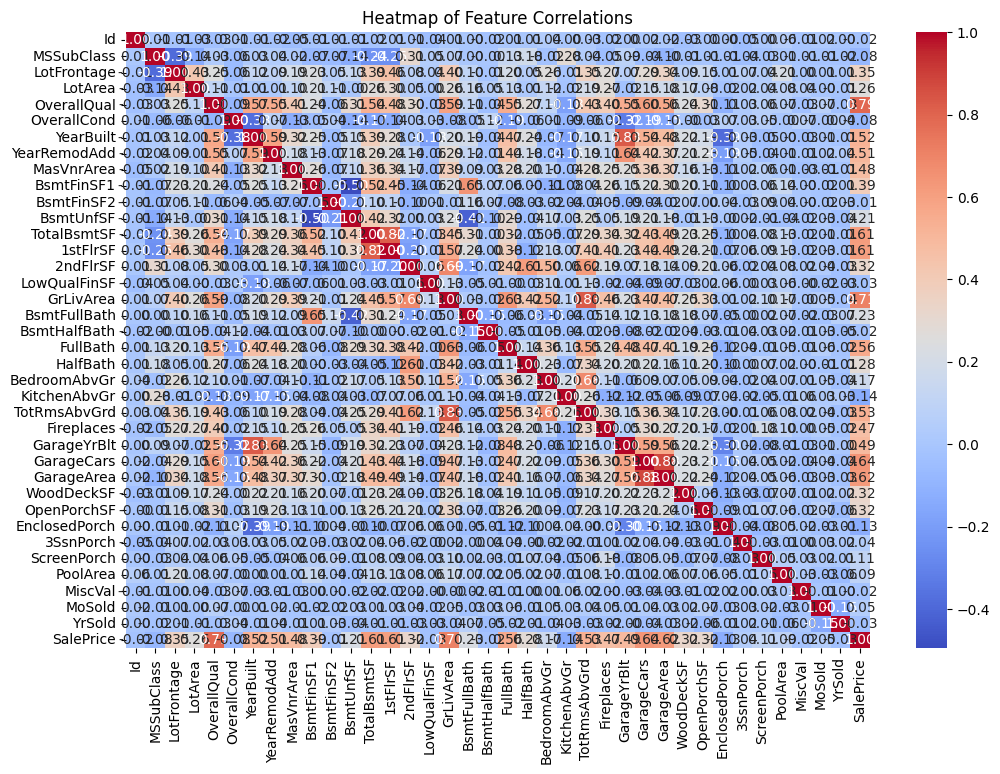

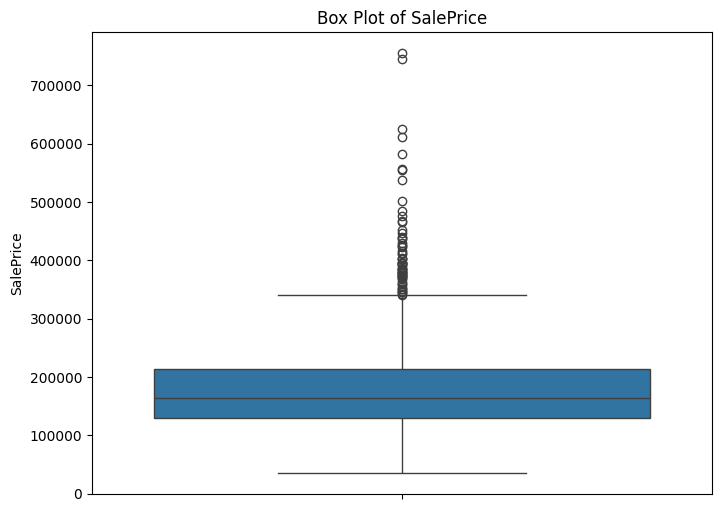

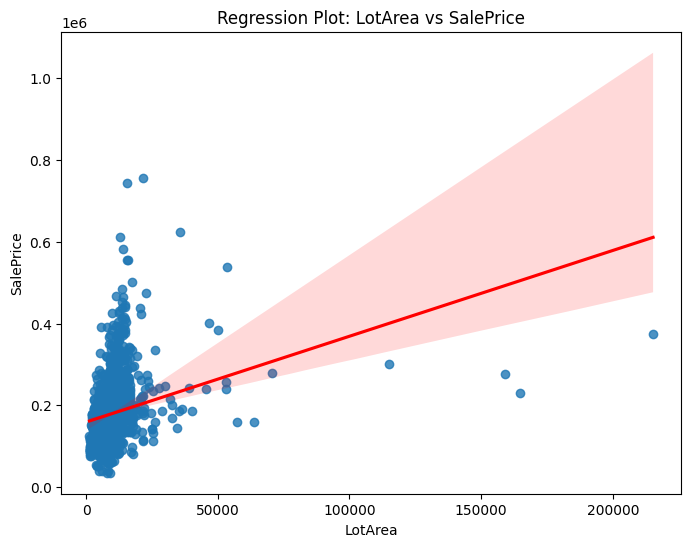

Pearson Correlation Coefficient: 0.2638
P-Value: 1.1231e-24


In [ ]:
print("\nDescriptive Statistics:")
print(train_data.describe())

# Heatmap
numeric_data = train_data.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap of Feature Correlations")
plt.show()

# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(train_data[target_column])
plt.title(f"Box Plot of {target_column}")
plt.show()

# 'LotArea' and 'SalePrice'
if 'LotArea' in train_data.columns:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=train_data['LotArea'], y=train_data[target_column], line_kws={"color": "red"})
    plt.title("Regression Plot: LotArea vs SalePrice")
    plt.show()

# Pearson Corr
if 'LotArea' in train_data.columns:
    corr, p_value = pearsonr(train_data['LotArea'], train_data[target_column])
    print(f"Pearson Correlation Coefficient: {corr:.4f}")
    print(f"P-Value: {p_value:.4e}")

In [ ]:
train_numeric_columns = [col for col in numeric_data.columns if col != target_column]
test_numeric_columns = [col for col in train_numeric_columns if col in test_data.columns]

train_data[train_numeric_columns] = train_data[train_numeric_columns].fillna(train_data[train_numeric_columns].mean())
test_data[test_numeric_columns] = test_data[test_numeric_columns].fillna(test_data[test_numeric_columns].mean())

# categorical features
categorical_columns = train_data.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)

# Alignment
y_train_target = train_data[target_column]

# One-hot encode
train_data = pd.get_dummies(train_data, columns=categorical_columns, drop_first=True)
test_data = pd.get_dummies(test_data, columns=categorical_columns, drop_first=True)
# train and test
train_data, test_data = train_data.align(test_data, join='inner', axis=1)
train_data[target_column] = y_train_target

Categorical Columns: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [ ]:
X = train_data.drop(columns=[target_column])
y = train_data[target_column]

# Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict
y_pred = lin_reg.predict(X_val)


Model Evaluation:
RMSE: 34690.3336
R² Score: 0.8431


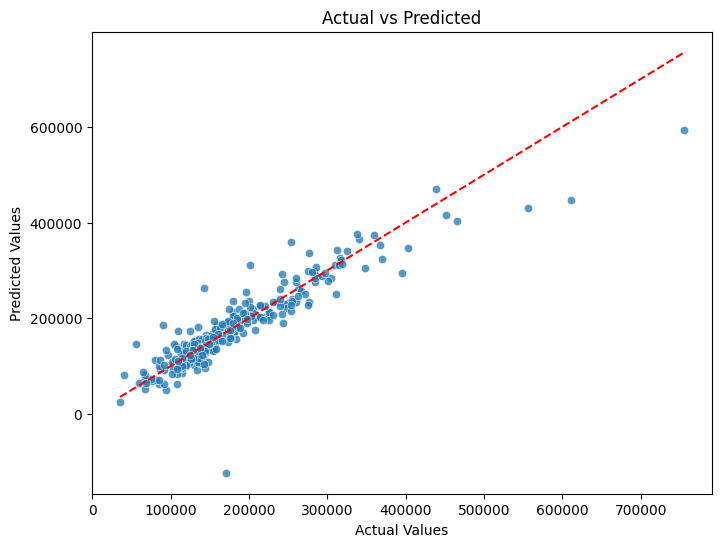

In [ ]:
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print("\nModel Evaluation:")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
# Visualize
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_val, y=y_pred, alpha=0.75)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()